Student Summary:
Alice: Total=255, Avg=85.00, Grade=B
Bob: Total=210, Avg=70.00, Grade=C
Charlie: Total=270, Avg=90.00, Grade=A
David: Total=180, Avg=60.00, Grade=C
Eva: Total=276, Avg=92.00, Grade=A

Top Performers:
Eva - 276 Marks
Charlie - 270 Marks
Alice - 255 Marks


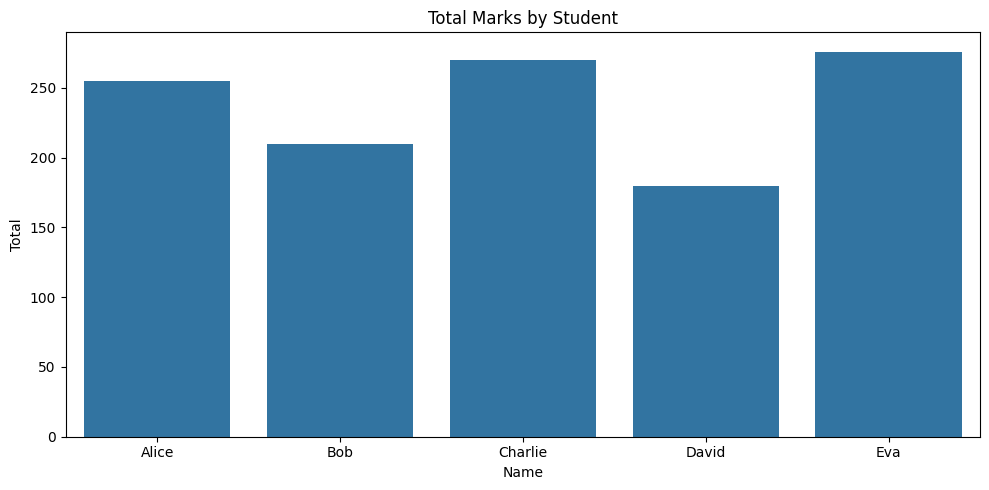

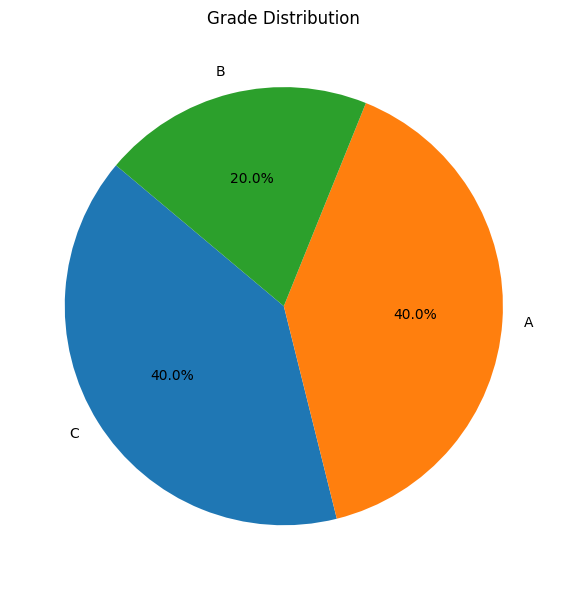

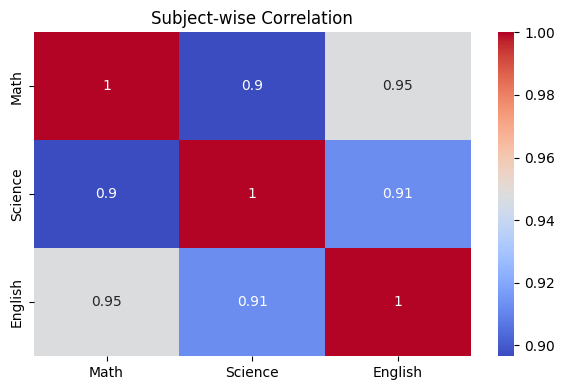

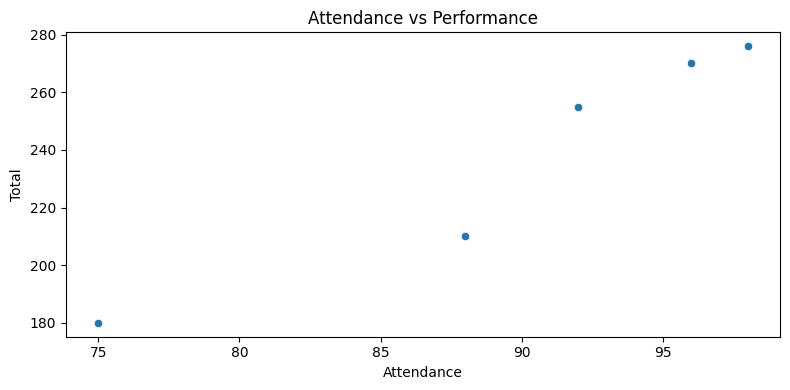

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


class Student:
    def __init__(self, name, math, science, english, attendance):
        self.name = name
        self.math = math
        self.science = science
        self.english = english
        self.attendance = attendance
        self.total = self.math + self.science + self.english
        self.average = self.total / 3
        self.grade = self.assign_grade()

    def assign_grade(self):
        if self.average >= 90:
            return 'A'
        elif self.average >= 75:
            return 'B'
        elif self.average >= 60:
            return 'C'
        else:
            return 'D'


class PerformanceAnalyzer:
    def __init__(self, csv_path):
        self.df = pd.read_csv('/content/student_data.csv')
        self.students = []
        self.create_students()

    def create_students(self):
        for _, row in self.df.iterrows():
            student = Student(row['Name'], row['Math'], row['Science'], row['English'], row['Attendance'])
            self.students.append(student)

    def display_summary(self):
        print("Student Summary:")
        for student in self.students:
            print(f"{student.name}: Total={student.total}, Avg={student.average:.2f}, Grade={student.grade}")

    def top_performers(self, top_n=3):
        top = sorted(self.students, key=lambda x: x.total, reverse=True)[:top_n]
        print("\nTop Performers:")
        for student in top:
            print(f"{student.name} - {student.total} Marks")

    def visualize_data(self):
        self.df['Total'] = self.df[['Math', 'Science', 'English']].sum(axis=1)
        plt.figure(figsize=(10, 5))
        sns.barplot(x='Name', y='Total', data=self.df)
        plt.title('Total Marks by Student')
        plt.tight_layout()
        plt.show()

        grades = [s.grade for s in self.students]
        grade_counts = pd.Series(grades).value_counts()
        plt.figure(figsize=(6, 6))
        plt.pie(grade_counts, labels=grade_counts.index, autopct='%1.1f%%', startangle=140)
        plt.title('Grade Distribution')
        plt.tight_layout()
        plt.show()

        plt.figure(figsize=(6, 4))
        sns.heatmap(self.df[['Math', 'Science', 'English']].corr(), annot=True, cmap='coolwarm')
        plt.title("Subject-wise Correlation")
        plt.tight_layout()
        plt.show()

        plt.figure(figsize=(8, 4))
        sns.scatterplot(x='Attendance', y='Total', data=self.df)
        plt.title('Attendance vs Performance')
        plt.tight_layout()
        plt.show()


if __name__ == "__main__":
    analyzer = PerformanceAnalyzer('student_data.csv')
    analyzer.display_summary()
    analyzer.top_performers()
    analyzer.visualize_data()
